# K-Nearest Neighbors (KNN) Algorithm

## Introduction

The K-Nearest Neighbors (KNN) algorithm is a non-parametric, instance-based learning method used for classification and regression. Unlike parametric models that learn a fixed set of parameters, KNN stores the entire training dataset and makes predictions based on the similarity between new data points and existing observations.

## Mathematical Foundation

### Distance Metrics

The core of KNN relies on measuring distances between points in feature space. The most common metric is the **Euclidean distance**:

$$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

where $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ and $\mathbf{y} = (y_1, y_2, \ldots, y_n)$ are $n$-dimensional feature vectors.

Other commonly used metrics include:

**Manhattan Distance (L1 norm):**
$$d_1(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i|$$

**Minkowski Distance (generalized):**
$$d_p(\mathbf{x}, \mathbf{y}) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}$$

### Classification Rule

For a query point $\mathbf{x}_q$, KNN classification proceeds as follows:

1. Compute distances $d(\mathbf{x}_q, \mathbf{x}_i)$ for all training points $\mathbf{x}_i$
2. Select the $k$ nearest neighbors: $\mathcal{N}_k(\mathbf{x}_q)$
3. Assign the class by majority vote:

$$\hat{y} = \arg\max_{c} \sum_{i \in \mathcal{N}_k(\mathbf{x}_q)} \mathbb{1}(y_i = c)$$

where $\mathbb{1}(\cdot)$ is the indicator function.

### Weighted KNN

A refinement weights votes by inverse distance:

$$\hat{y} = \arg\max_{c} \sum_{i \in \mathcal{N}_k(\mathbf{x}_q)} w_i \cdot \mathbb{1}(y_i = c)$$

where the weight $w_i = \frac{1}{d(\mathbf{x}_q, \mathbf{x}_i) + \epsilon}$ and $\epsilon$ prevents division by zero.

### Bias-Variance Tradeoff

The choice of $k$ controls model complexity:
- **Small $k$**: Low bias, high variance (sensitive to noise)
- **Large $k$**: High bias, low variance (smoother decision boundaries)

The optimal $k$ balances these competing effects and is typically chosen via cross-validation.

## Implementation

We will implement KNN from scratch and demonstrate its application on a synthetic classification dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
class KNearestNeighbors:
    """
    K-Nearest Neighbors classifier implementation from scratch.
    
    Parameters
    ----------
    k : int
        Number of neighbors to consider
    weighted : bool
        If True, weight votes by inverse distance
    """
    
    def __init__(self, k=3, weighted=False):
        self.k = k
        self.weighted = weighted
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """Store the training data."""
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def _euclidean_distance(self, x1, x2):
        """Compute Euclidean distance between two points."""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _predict_single(self, x):
        """Predict class for a single sample."""
        # Compute distances to all training points
        distances = [self._euclidean_distance(x, x_train) 
                     for x_train in self.X_train]
        
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        k_nearest_distances = np.array(distances)[k_indices]
        
        if self.weighted:
            # Weighted voting by inverse distance
            weights = 1.0 / (k_nearest_distances + 1e-8)
            class_weights = {}
            for label, weight in zip(k_nearest_labels, weights):
                class_weights[label] = class_weights.get(label, 0) + weight
            return max(class_weights, key=class_weights.get)
        else:
            # Simple majority voting
            most_common = Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]
    
    def predict(self, X):
        """Predict classes for multiple samples."""
        X = np.array(X)
        return np.array([self._predict_single(x) for x in X])
    
    def score(self, X, y):
        """Compute classification accuracy."""
        predictions = self.predict(X)
        return np.mean(predictions == y)

## Generating Synthetic Data

We create a 2D classification dataset with three classes, each generated from a Gaussian distribution with different means.

In [3]:
def generate_classification_data(n_samples_per_class=100):
    """
    Generate synthetic 2D classification data with 3 classes.
    """
    # Class centers
    centers = [
        [0, 0],
        [4, 4],
        [0, 4]
    ]
    
    X = []
    y = []
    
    for class_idx, center in enumerate(centers):
        # Generate samples from Gaussian distribution
        samples = np.random.randn(n_samples_per_class, 2) * 1.0 + center
        X.append(samples)
        y.extend([class_idx] * n_samples_per_class)
    
    X = np.vstack(X)
    y = np.array(y)
    
    # Shuffle the data
    shuffle_idx = np.random.permutation(len(y))
    return X[shuffle_idx], y[shuffle_idx]

# Generate data
X, y = generate_classification_data(n_samples_per_class=100)

# Split into training and test sets (80-20 split)
n_train = int(0.8 * len(y))
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 240
Test samples: 60


## Training and Evaluation

In [4]:
# Train KNN with different values of k
k_values = [1, 3, 5, 7, 11, 15, 21]
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNearestNeighbors(k=k)
    knn.fit(X_train, y_train)
    
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"k={k:2d}: Train Accuracy = {train_acc:.3f}, Test Accuracy = {test_acc:.3f}")

k= 1: Train Accuracy = 1.000, Test Accuracy = 0.967


k= 3: Train Accuracy = 0.963, Test Accuracy = 0.967


k= 5: Train Accuracy = 0.954, Test Accuracy = 0.950


k= 7: Train Accuracy = 0.967, Test Accuracy = 0.983


k=11: Train Accuracy = 0.975, Test Accuracy = 0.967


k=15: Train Accuracy = 0.967, Test Accuracy = 0.967
k=21: Train Accuracy = 0.967, Test Accuracy = 0.967


## Visualization

We create a comprehensive visualization showing:
1. Decision boundaries for different values of $k$
2. Accuracy vs. $k$ curve demonstrating the bias-variance tradeoff

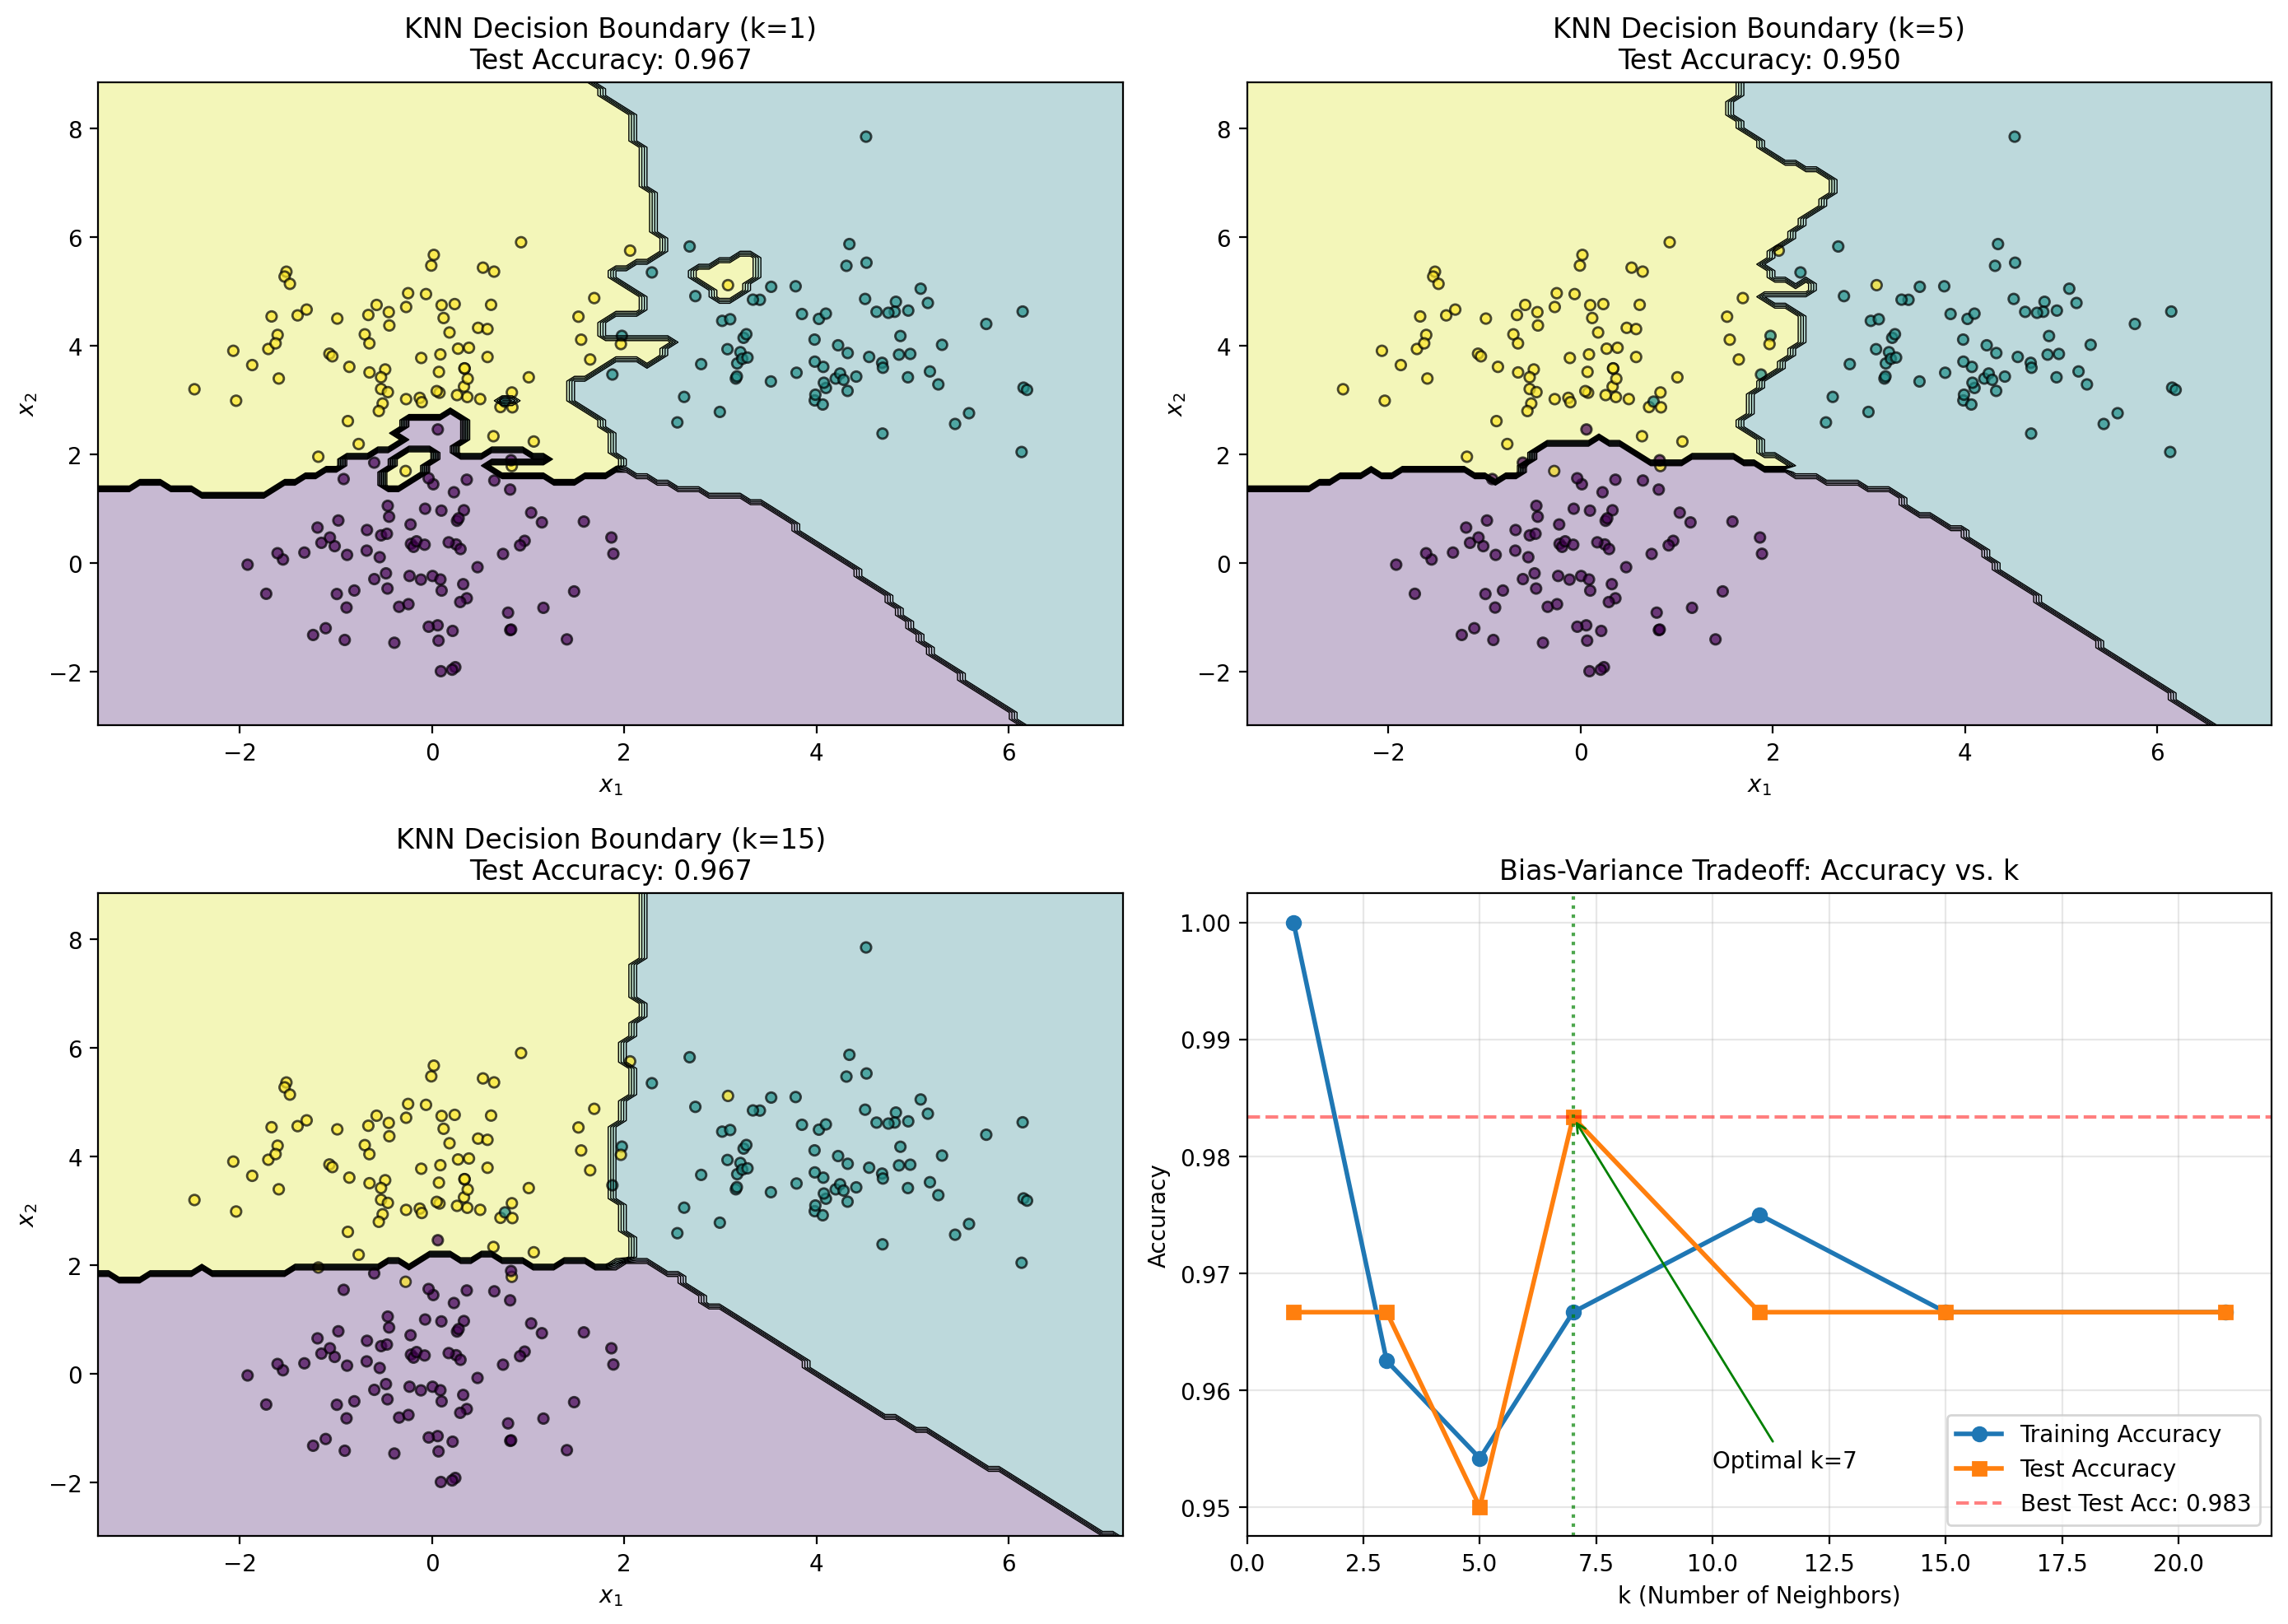


Plot saved to 'plot.png'


In [5]:
def plot_decision_boundary(ax, knn, X, y, title):
    """
    Plot the decision boundary of a trained KNN classifier.
    """
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict on mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax.contour(xx, yy, Z, colors='k', linewidths=0.5)
    
    # Plot training points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', 
                         edgecolors='k', s=20, alpha=0.7)
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(title)
    
    return scatter

# Create figure with subplots
fig = plt.figure(figsize=(14, 10))

# Plot decision boundaries for k=1, 5, 15
k_to_plot = [1, 5, 15]
for idx, k in enumerate(k_to_plot):
    ax = fig.add_subplot(2, 2, idx + 1)
    knn = KNearestNeighbors(k=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    plot_decision_boundary(ax, knn, X_train, y_train, 
                          f'KNN Decision Boundary (k={k})\nTest Accuracy: {acc:.3f}')

# Plot accuracy vs k
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(k_values, train_accuracies, 'o-', label='Training Accuracy', linewidth=2)
ax4.plot(k_values, test_accuracies, 's-', label='Test Accuracy', linewidth=2)
ax4.axhline(y=max(test_accuracies), color='r', linestyle='--', alpha=0.5, 
            label=f'Best Test Acc: {max(test_accuracies):.3f}')

# Mark optimal k
best_k_idx = np.argmax(test_accuracies)
best_k = k_values[best_k_idx]
ax4.axvline(x=best_k, color='g', linestyle=':', alpha=0.7)
ax4.annotate(f'Optimal k={best_k}', xy=(best_k, test_accuracies[best_k_idx]),
             xytext=(best_k + 3, test_accuracies[best_k_idx] - 0.03),
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=10)

ax4.set_xlabel('k (Number of Neighbors)')
ax4.set_ylabel('Accuracy')
ax4.set_title('Bias-Variance Tradeoff: Accuracy vs. k')
ax4.legend(loc='lower right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('k_nearest_neighbors_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Analysis and Conclusions

### Key Observations

1. **Decision Boundary Complexity**: As $k$ increases, decision boundaries become smoother. For $k=1$, boundaries are highly irregular and conform closely to individual training points (overfitting). Larger $k$ values produce more generalized boundaries.

2. **Bias-Variance Tradeoff**: 
   - Training accuracy decreases monotonically with $k$ (increased bias)
   - Test accuracy typically shows a U-shaped curve, with optimal performance at intermediate $k$

3. **Computational Considerations**: KNN has $O(1)$ training time but $O(nd)$ prediction time for $n$ training samples and $d$ dimensions. For large datasets, approximate nearest neighbor algorithms (e.g., KD-trees, ball trees) are preferred.

### Algorithm Properties

**Advantages:**
- Simple to understand and implement
- No explicit training phase
- Naturally handles multi-class problems
- Can capture complex decision boundaries

**Limitations:**
- Computationally expensive at prediction time
- Sensitive to irrelevant features and the curse of dimensionality
- Requires feature scaling for meaningful distance computation
- Memory-intensive (stores all training data)